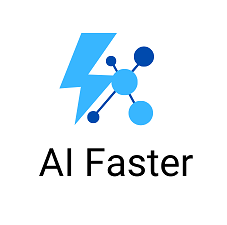

Ngoài web machinelearningcoban mọi người có thể tham khảo thêm ebook này cùng 1 tác giả với trang web nhưng có những cái mới hơn https://github.com/tiepvupsu/ebookMLCB/blob/master/book_ML_color.pdf
### Lab ôn tập Logistic resgression

**Viết chương trình để xử lý bài toán phân biệt hai chữ số viết tay  0 và 1 trong bộ cơ sở dữ liệu MNIST bằng Logistic resgression và KNN. So sánh kết quả của 2 mô hình và hiển thị các trường hợp dự đoán sai (nếu có)**



Kích thước của bộ dữ liệu MNIST của tensorflow lớn hơn của sklearn nên sẽ có kết quả tốt hơn

Trước tiên nên install thư viện tensorflow 

In [4]:
import tensorflow as tf

# Tải bộ dữ liệu MNIST từ TensorFlow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# In thông tin về dữ liệu
print("Kích thước dữ liệu huấn luyện:", x_train.shape)
print("Kích thước nhãn huấn luyện:", y_train.shape)
print("Kích thước dữ liệu kiểm tra:", x_test.shape)
print("Kích thước nhãn kiểm tra:", y_test.shape)


11490434/11490434 [==============================] - 2s 0us/step
Kích thước dữ liệu huấn luyện: (60000, 28, 28)
Kích thước nhãn huấn luyện: (60000,)
Kích thước dữ liệu kiểm tra: (10000, 28, 28)
Kích thước nhãn kiểm tra: (10000,)


In [43]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import neighbors, datasets
# Tải dữ liệu MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Chọn chỉ các mẫu chứa chữ số 0 và 1
X_01 = X[(y == '0') | (y == '8')]
y_01 = y[(y == '0') | (y == '8')]

# Chuẩn bị dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.2, random_state=0)
X_train = X_train / 255.0  # Chuẩn hóa dữ liệu
X_test = X_test / 255.0

/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [64]:
print(X_test)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
5340      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
58609     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10733     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
35559     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12118     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51440     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
64634     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
63401     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
56940     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
47312     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [71]:

# Huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình KNN
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
knn_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Đánh giá độ chính xác của hai mô hình
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of Logistic Regression: %.2f%%" %(accuracy_lr*100))
print("Accuracy of KNN: %.2f %%" %(100*accuracy_knn))


/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy of Logistic Regression: 99.38%
Accuracy of KNN: 99.71 %


In [65]:
import numpy as np
def cal_accuracy_score(predict, labels):
    count = 0
    list_index_fail = []
    for i in range(len(predict)):
        if predict[i] == labels[i]:
            count += 1
        else:
            list_index_fail.append(i)

    accuracy = count / len(predict)
    return accuracy, list_index_fail

y_test = np.array(y_test)
X_test = np.array(X_test)

In [72]:
accLG, failLG  = cal_accuracy_score(y_pred_lr,y_test)
print(failLG)
accKnn, failKnn = cal_accuracy_score(y_pred_knn,y_test)
print(failKnn)

[258, 453, 715, 863, 910, 1080, 1324, 1459, 1514, 1630, 1669, 1682, 1724, 2084, 2449, 2537, 2640]
[173, 1495, 1630, 1724, 2042, 2100, 2394, 2537]


0


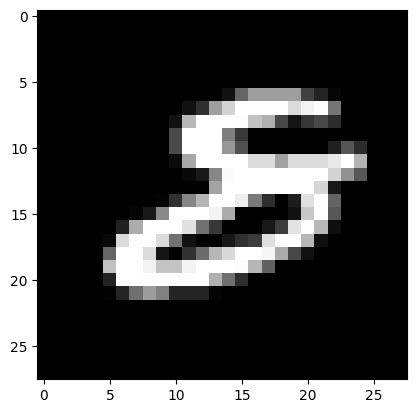

In [75]:
import matplotlib.pyplot as plt
imgLG = X_test[258]
plt.gray()
plt.imshow(imgLG.reshape(28,28))
print(y_pred_lr[258])


0


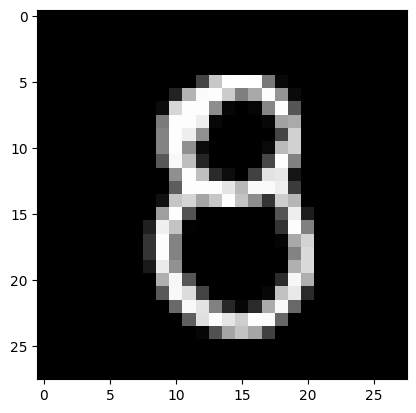

In [76]:
imgKnn = X_test[173]
plt.gray()
plt.imshow(imgKnn.reshape(28,28))
print(y_pred_knn[173])